In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../../datasets/alphabet/A_Z Handwritten Data.csv')

In [3]:
df.shape

(372450, 785)

In [6]:
df.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [7]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y=df['0']
X=df.drop('0',axis=1)

In [14]:
X.shape

(372450, 784)

In [15]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


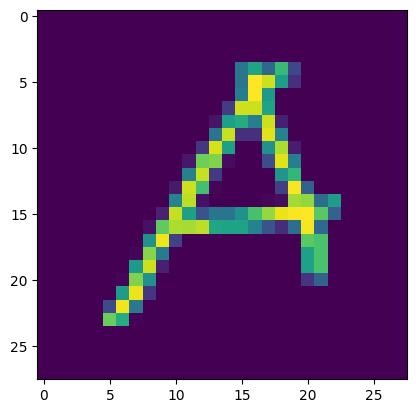

In [16]:
A=X.iloc[3].values.reshape(28,28)
plt.imshow(A)

In [17]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [18]:
X=X.values.reshape(372450,28,28,1)
X.shape

(372450, 28, 28, 1)

In [19]:
X_train=X/255

In [20]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
ya = to_categorical(y,num_classes=26)

In [23]:
ya[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [27]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(26,activation='softmax')) # softmax gives output in probability format

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,ya,epochs=30,batch_size=64)

Epoch 1/30
5820/5820 [==============================] - 113s 15ms/step - loss: 0.2817 - accuracy: 0.9210
Epoch 2/30
5820/5820 [==============================] - 94s 16ms/step - loss: 0.0946 - accuracy: 0.9740
Epoch 3/30
5820/5820 [==============================] - 89s 15ms/step - loss: 0.0750 - accuracy: 0.9795
Epoch 4/30
5820/5820 [==============================] - 92s 16ms/step - loss: 0.0657 - accuracy: 0.9822
Epoch 5/30
5820/5820 [==============================] - 91s 16ms/step - loss: 0.0592 - accuracy: 0.9839
Epoch 6/30
5820/5820 [==============================] - 87s 15ms/step - loss: 0.0557 - accuracy: 0.9848
Epoch 7/30
5820/5820 [==============================] - 91s 16ms/step - loss: 0.0524 - accuracy: 0.9856
Epoch 8/30
5820/5820 [==============================] - 87s 15ms/step - loss: 0.0501 - accuracy: 0.9863
Epoch 9/30
5820/5820 [==============================] - 87s 15ms/step - loss: 0.0486 - accuracy: 0.9866
Epoch 10/30
5820/5820 [==============================] - 92s 16

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 16)               

In [29]:
model.evaluate(X_train,ya)

11640/11640 [==============================] - 58s 3ms/step - loss: 0.0424 - accuracy: 0.9877


[0.04238291084766388, 0.9876788854598999]

In [31]:
A=X_train[372449].reshape(1,28,28,1)
model.predict_on_batch(A).argmax()

25

In [32]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [33]:
import cv2
def get_alphabet(path):
    A=cv2.imread(path,0)
    A=cv2.resize(A,(28,28))
    A=A/255
    A=A.reshape(1,28,28,1)
    return model.predict_on_batch(A).argmax()

In [34]:
import os

In [49]:
for img in os.listdir('../../datasets/alphabet/m_imgs/'):
    print('../../datasets/alphabet/m_imgs/'+img)


../../datasets/alphabet/m_imgs/A.jpg
../../datasets/alphabet/m_imgs/AA.jpg
../../datasets/alphabet/m_imgs/B.jpg
../../datasets/alphabet/m_imgs/C.jpg
../../datasets/alphabet/m_imgs/F.jpg
../../datasets/alphabet/m_imgs/J.jpg
../../datasets/alphabet/m_imgs/M.jpg
../../datasets/alphabet/m_imgs/X.jpg
../../datasets/alphabet/m_imgs/Z.jpg


In [50]:
for img in os.listdir('../../datasets/alphabet/m_imgs/'):
    y = get_alphabet('../../datasets/alphabet/m_imgs/'+img)
    y=pd.Series(y)
    y=y.map({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'})
    print(img,'\t',y.iloc[0])

A.jpg 	 A
AA.jpg 	 A
B.jpg 	 H
C.jpg 	 C
F.jpg 	 F
J.jpg 	 J
M.jpg 	 M
X.jpg 	 X
Z.jpg 	 Z
